In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-behavior/customer_behavior_analytcis.csv


# Loading the dataset

In [5]:
train = pd.read_csv('/kaggle/input/customer-behavior/customer_behavior_analytcis.csv')

In [3]:
train

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997



* total_purchases - discrete values
* avg_cart_value - continuous values
* total_time_spent - continuous value
* product_click - discrete value
* discount_counts - discrete value



# check for any duplicates

In [29]:
train[train.duplicated()]

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id


# dataset summary

In [31]:
train.columns

Index(['total_purchases', 'avg_cart_value', 'total_time_spent',
       'product_click', 'discount_counts', 'customer_id'],
      dtype='object')

In [32]:
train.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


# Fill missing values
* total purchases - median
* avg_cart_value - mean
* product_click - median

In [6]:
# Function to calculate missing values by column# Funct 
# from https://www.kaggle.com/parulpandey/starter-code-with-baseline
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values for training data
missing_values_train = missing_values_table(train)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Your selected dataframe has 6 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
total_purchases,20,2.000000
avg_cart_value,20,2.000000
product_click,20,2.000000


In [30]:
train.isnull().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

In [36]:
train['total_purchases'].fillna(train['total_purchases'].median(), inplace=True)
train['avg_cart_value'].fillna(train['avg_cart_value'].mean(), inplace=True)
train['product_click'].fillna(train['product_click'].median(), inplace=True)

<ipython-input-36-840a714b81c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['total_purchases'].fillna(train['total_purchases'].median(), inplace=True)
<ipython-input-36-840a714b81c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_purchases'].fillna(train['total_purchases'].median(), inplace=True)
<ipython-input-36-840

# check for Outliers

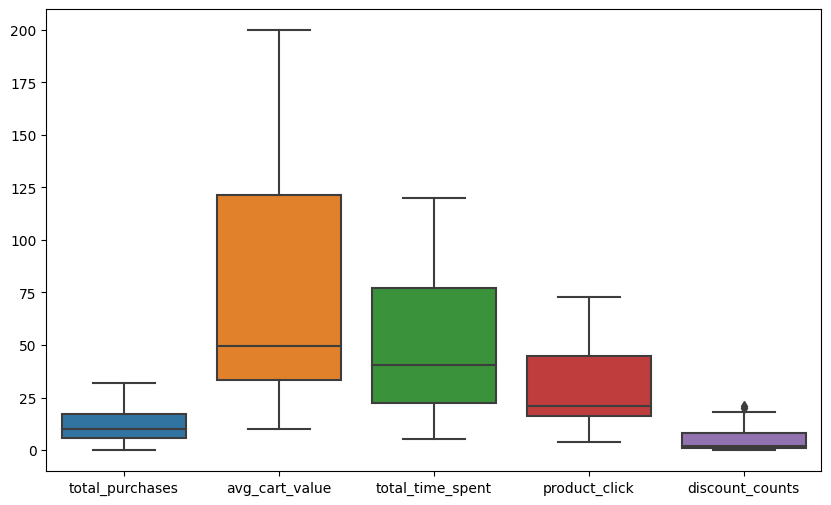

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Detect outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=train[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']])
#sns.boxplot(data=train[['total_purchases']])

plt.show()

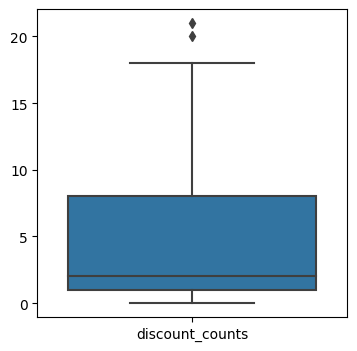

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Detect outliers using boxplots
plt.figure(figsize=(4,4))
#sns.boxplot(data=train[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']])
sns.boxplot(data=train[['discount_counts']])
#sns.boxplot(data=train[['total_purchases']])

plt.show()


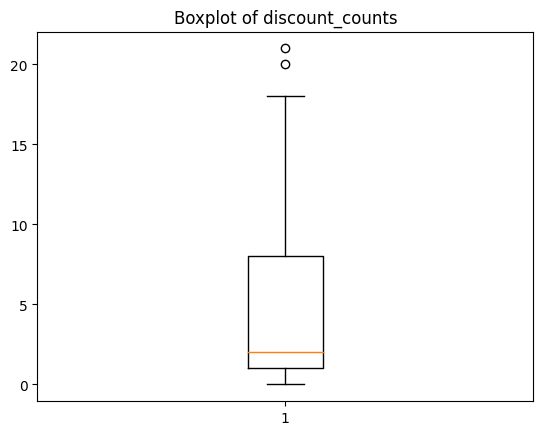

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing outliers
plt.boxplot(train['discount_counts'])
plt.title("Boxplot of discount_counts")
plt.show()

# Calculate IQR
Q1 = train['discount_counts'].quantile(0.25)
Q3 = train['discount_counts'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
train= train[(train['discount_counts'] >= lower_bound) & (train['discount_counts'] <= upper_bound)]


In [34]:
train

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


# Data visualization

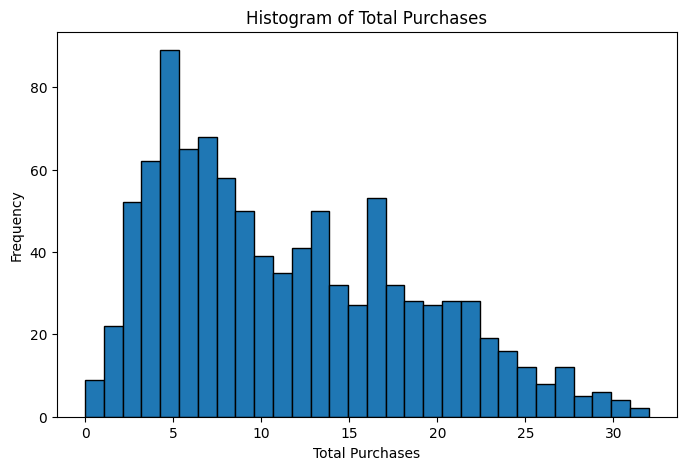

In [8]:
import matplotlib.pyplot as plt

# Plot histogram for 'total_purchases'
plt.figure(figsize=(8, 5))
plt.hist(train['total_purchases'],bins=30, edgecolor='black')
plt.xlabel("Total Purchases")
plt.ylabel("Frequency")
plt.title("Histogram of Total Purchases")
plt.show()


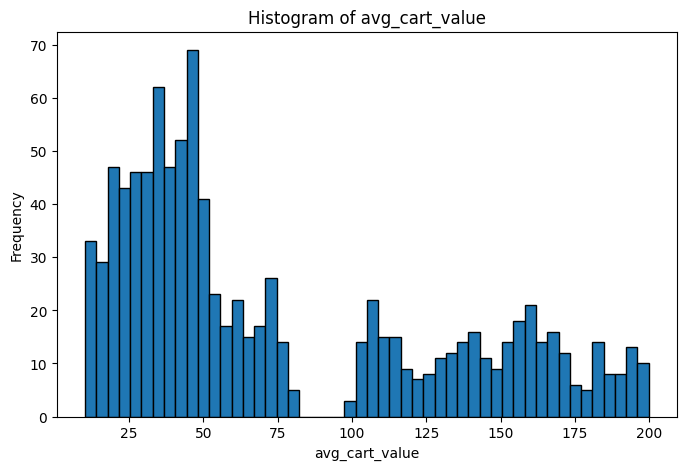

In [16]:
import matplotlib.pyplot as plt

# Plot histogram for 'total_purchases'
plt.figure(figsize=(8, 5))
plt.hist(train['avg_cart_value'], bins=50, edgecolor='black')
plt.xlabel("avg_cart_value")
plt.ylabel("Frequency")
plt.title("Histogram of avg_cart_value")
plt.show()


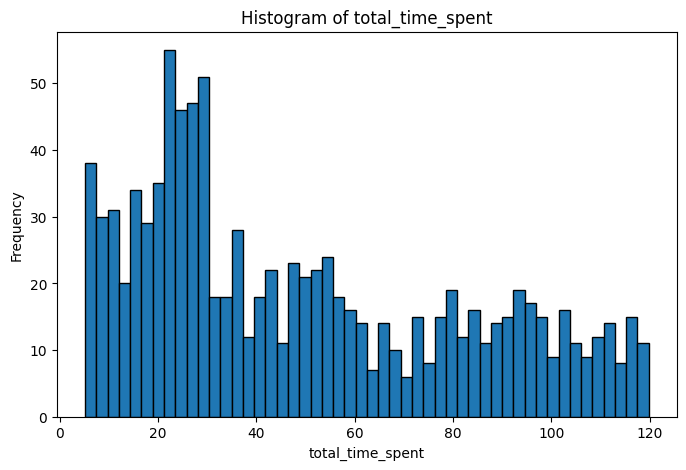

In [17]:
import matplotlib.pyplot as plt

# Plot histogram for 'total_purchases'
plt.figure(figsize=(8, 5))
plt.hist(train['total_time_spent'], bins=50, edgecolor='black')
plt.xlabel("total_time_spent")
plt.ylabel("Frequency")
plt.title("Histogram of total_time_spent")
plt.show()


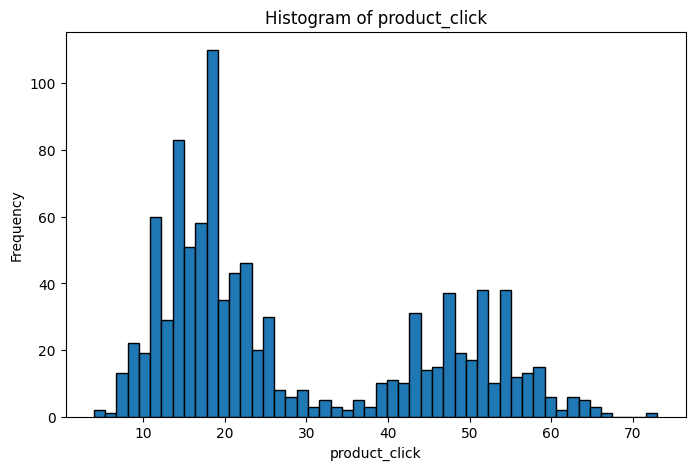

In [10]:
import matplotlib.pyplot as plt

# Plot histogram for 'total_purchases'
plt.figure(figsize=(8, 5))
plt.hist(train['product_click'], bins=50, edgecolor='black')
plt.xlabel("product_click")
plt.ylabel("Frequency")
plt.title("Histogram of product_click")
plt.show()


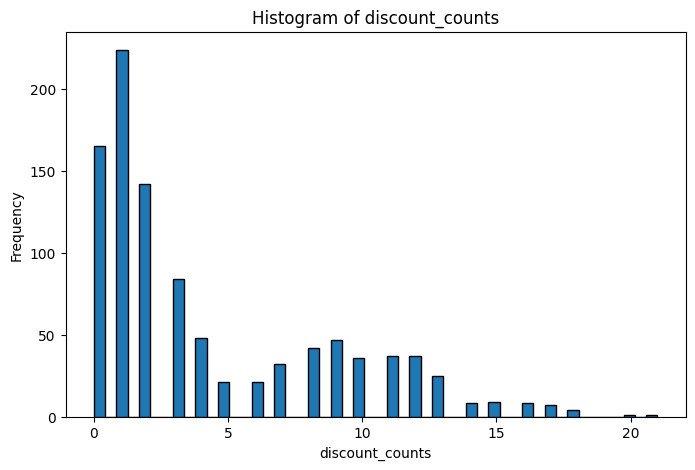

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for 'total_purchases'
plt.figure(figsize=(8, 5))
plt.hist(train['discount_counts'], bins=50, edgecolor='black')
plt.xlabel("discount_counts")
plt.ylabel("Frequency")
plt.title("Histogram of discount_counts")
plt.show()


In [37]:
train.isnull().sum()

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64

# Feature Scaling

**K-Means is sensitive to scale, so we need to normalize data.**

In [38]:
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train.drop(columns=['customer_id']))  # Exclude customer_id
df_scaled = pd.DataFrame(scaled_features, columns=train.columns[1:])




# Clustering

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Train K-Means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
train['Cluster'] = kmeans.fit_predict(df_scaled)
#train_scaled['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)


<ipython-input-39-0e8969ad743c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cluster'] = kmeans.fit_predict(df_scaled)


In [40]:
numeric_cols = train.select_dtypes(include=['number']).columns  # Select only numeric columns

# Compute cluster means only for numeric columns
cluster_means = train.groupby("Cluster")[numeric_cols].mean()

# Compute cluster means
#cluster_means = train.groupby("Cluster").mean()
print(cluster_means)

         total_purchases  avg_cart_value  total_time_spent  product_click  \
Cluster                                                                     
0              19.551515       31.228020         17.433697      15.090909   
1              10.169643      144.977412         40.560149      19.931548   
2               4.909366       49.270237         90.236314      49.456193   

         discount_counts  Cluster  
Cluster                            
0               9.915152      0.0  
1               1.949405      1.0  
2               1.030211      2.0  


In [41]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Feature", "Bargain Hunters", "High Spenders", "Window Shoppers"]

# Add rows with the provided data
table.add_row(["Total Purchases", "High", "Moderate", "Low"])
table.add_row(["Avg Cart Value", "Low", "High", "Moderate"])
table.add_row(["Time Spent", "Moderate", "Moderate", "High"])
table.add_row(["Product Clicks", "Moderate", "Moderate", "High"])
table.add_row(["Discount Usage", "High", "Low", "Low"])

# Print the table
print(table)


+-----------------+-----------------+---------------+-----------------+
|     Feature     | Bargain Hunters | High Spenders | Window Shoppers |
+-----------------+-----------------+---------------+-----------------+
| Total Purchases |       High      |    Moderate   |       Low       |
|  Avg Cart Value |       Low       |      High     |     Moderate    |
|    Time Spent   |     Moderate    |    Moderate   |       High      |
|  Product Clicks |     Moderate    |    Moderate   |       High      |
|  Discount Usage |       High      |      Low      |       Low       |
+-----------------+-----------------+---------------+-----------------+


* cluster 0 - Bargain Hunters
* cluster 1 - Window Shoppers
* cluster 2 - High Spenders

In [42]:
cluster_mapping = {0: "Bargain Hunters", 1: "Window Shoppers", 2: "High Spenders"}
train['Cluster_Label'] = train['Cluster'].map(cluster_mapping)


<ipython-input-42-abbbbfc8c791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cluster_Label'] = train['Cluster'].map(cluster_mapping)


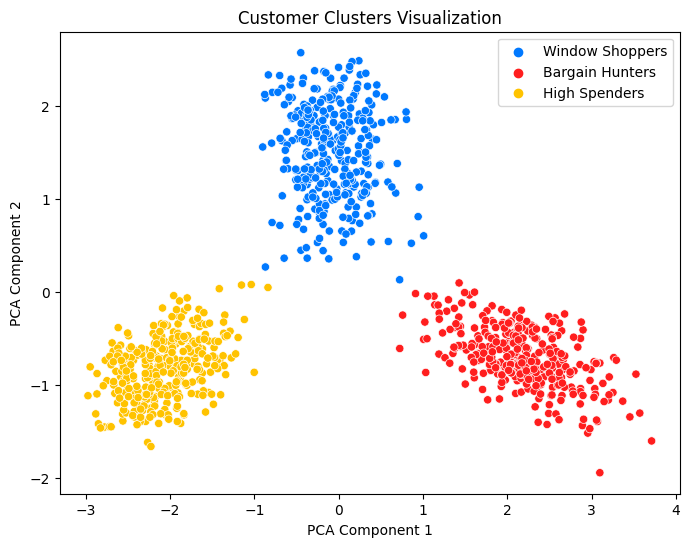

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)

custom_colours=['#0079FF','#FF1E1E','#FFC300']

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=train['Cluster_Label'], palette=custom_colours)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters Visualization")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

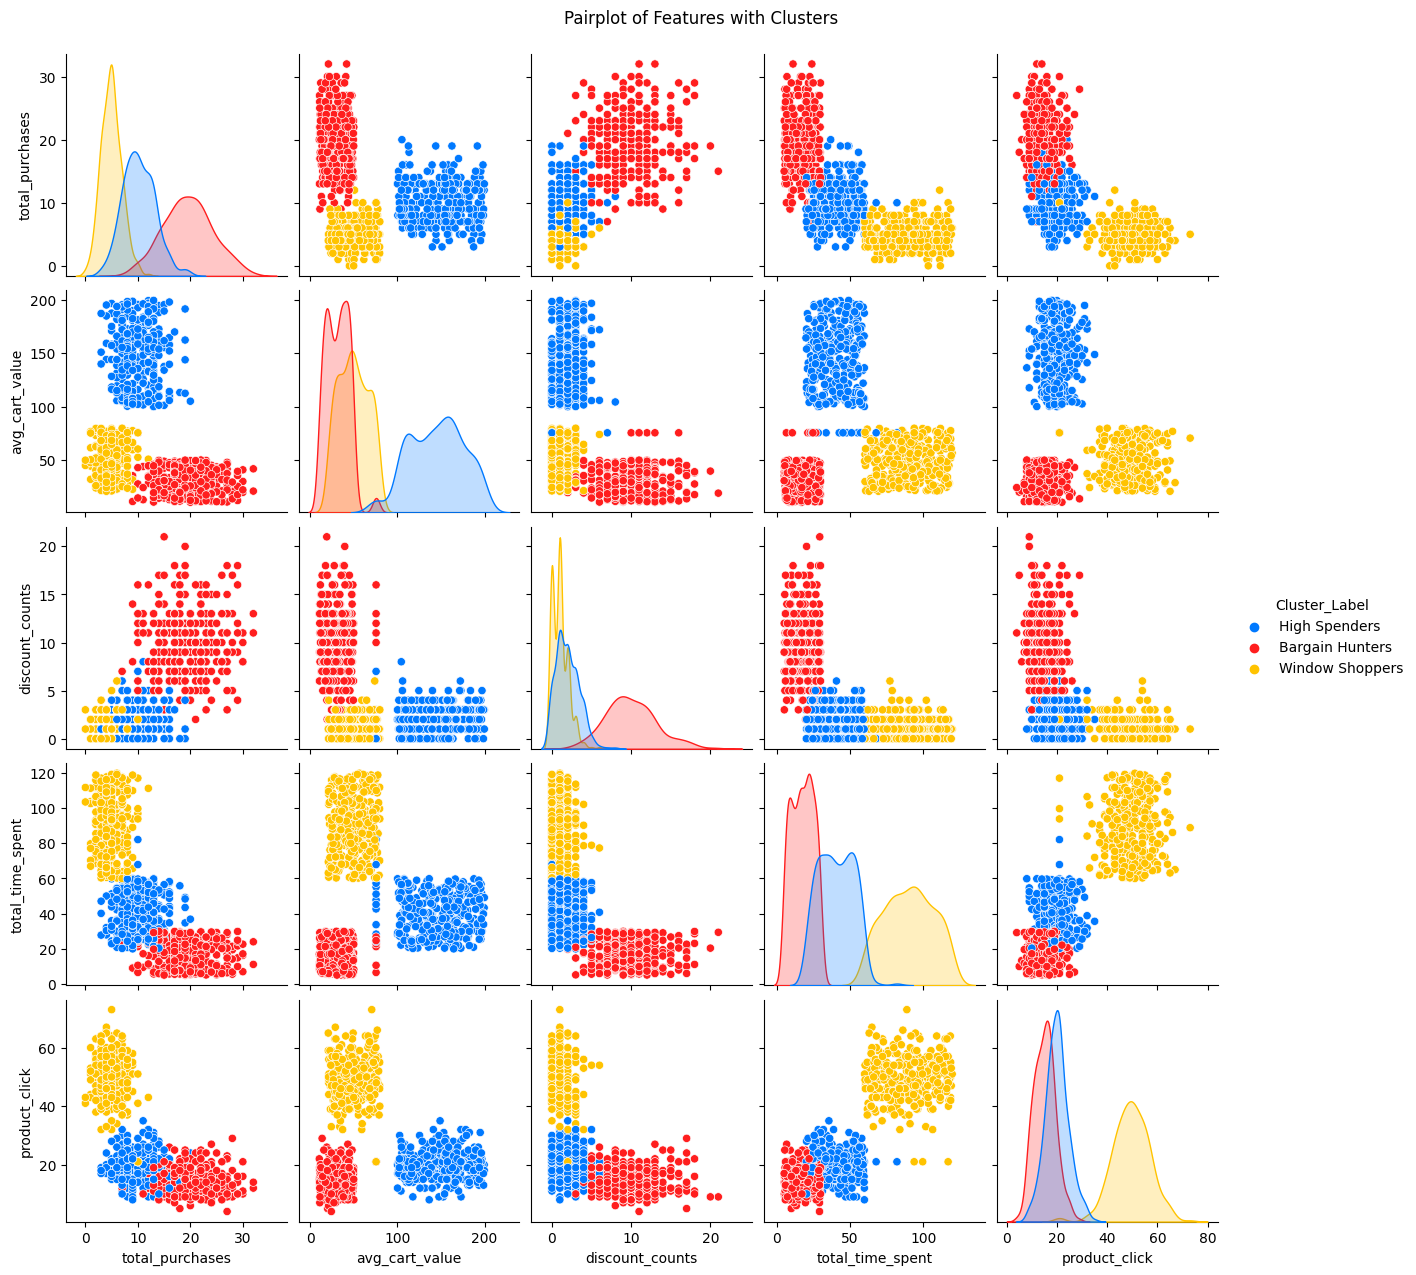

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features to visualize
features = ['total_purchases', 'avg_cart_value', 'discount_counts', 'total_time_spent', 'product_click']

custom_colours=['#0079FF','#FF1E1E','#FFC300']


# Create a pairplot to see the distribution of each feature within each cluster
sns.pairplot(train[features + ['Cluster_Label']], hue='Cluster_Label', palette=custom_colours, diag_kind='kde')
plt.suptitle("Pairplot of Features with Clusters", y=1.02)
plt.show()


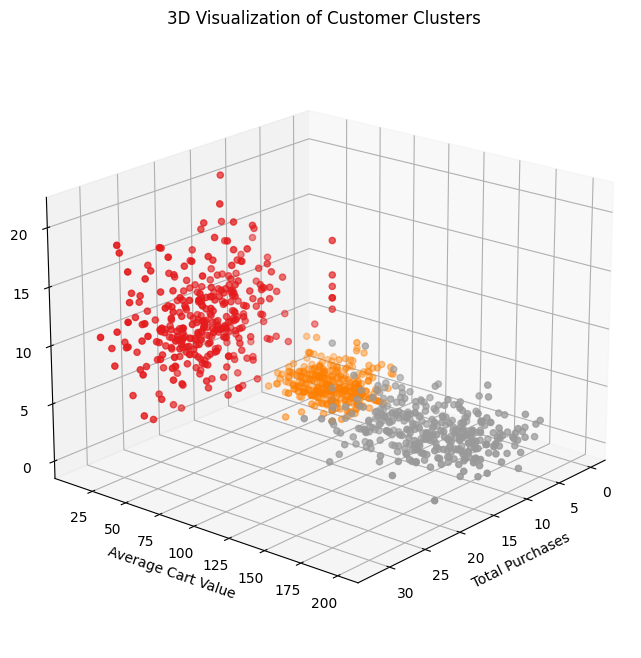

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

custom_colours = ['#0079FF', '#FF1E1E', '#FFC300']

# Scatter plot
ax.scatter(train['total_purchases'], train['avg_cart_value'], train['discount_counts'], c=train['Cluster'], cmap='Set1')

# Labels
ax.set_xlabel('Total Purchases')
ax.set_ylabel('Average Cart Value')
ax.set_zlabel('Discount Count')
plt.title("3D Visualization of Customer Clusters")

# Set different view angles
# View angle 1: Elevation 20, Azimuth 30
ax.view_init(elev=20, azim=40)

# Show the plot
plt.show()


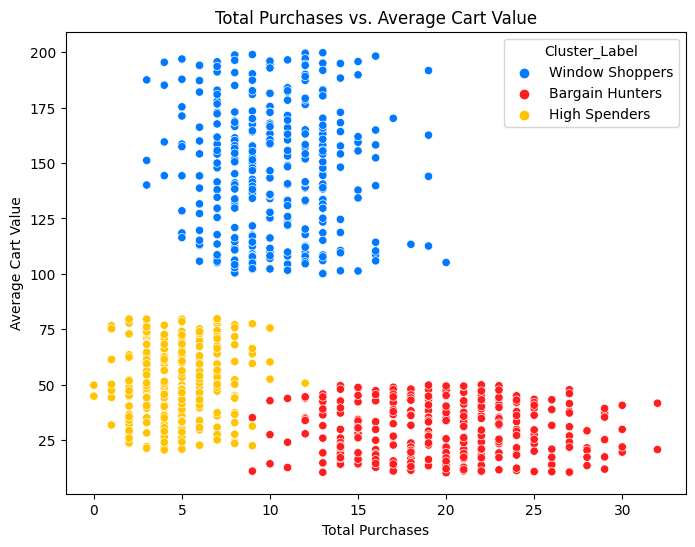

In [48]:
# Scatter plot for Total Purchases vs. Average Cart Value
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['total_purchases'], y=train['avg_cart_value'], hue=train['Cluster_Label'], palette=custom_colours)
plt.title("Total Purchases vs. Average Cart Value")
plt.xlabel('Total Purchases')
plt.ylabel('Average Cart Value')
plt.show()


# Different Clustering Techniques

In [39]:
#Kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
train['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
train['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

#DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
train['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

#Gaussian Mixture Model (GMM)
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
train['GMM_Cluster'] = gmm.fit_predict(scaled_features)

#Spectral Clustering
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, random_state=42)
train['Spectral_Cluster'] = spectral.fit_predict(scaled_features)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-41-c963e7cb24f3>:18: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['KMeans_Cluster'], palette=custom_colours)
<ipython-input-41-c963e7cb24f3>:23: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['Hierarchical_Cluster'], palette=custom_colours)
<ipython-input-41-c963e7cb24f3>:33: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['GMM_Cluster'], palette=custom_colours)
<ipython-input-41-c963e7cb24f3>:38: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['Spectral_Cluster'], palette=custom_colours)


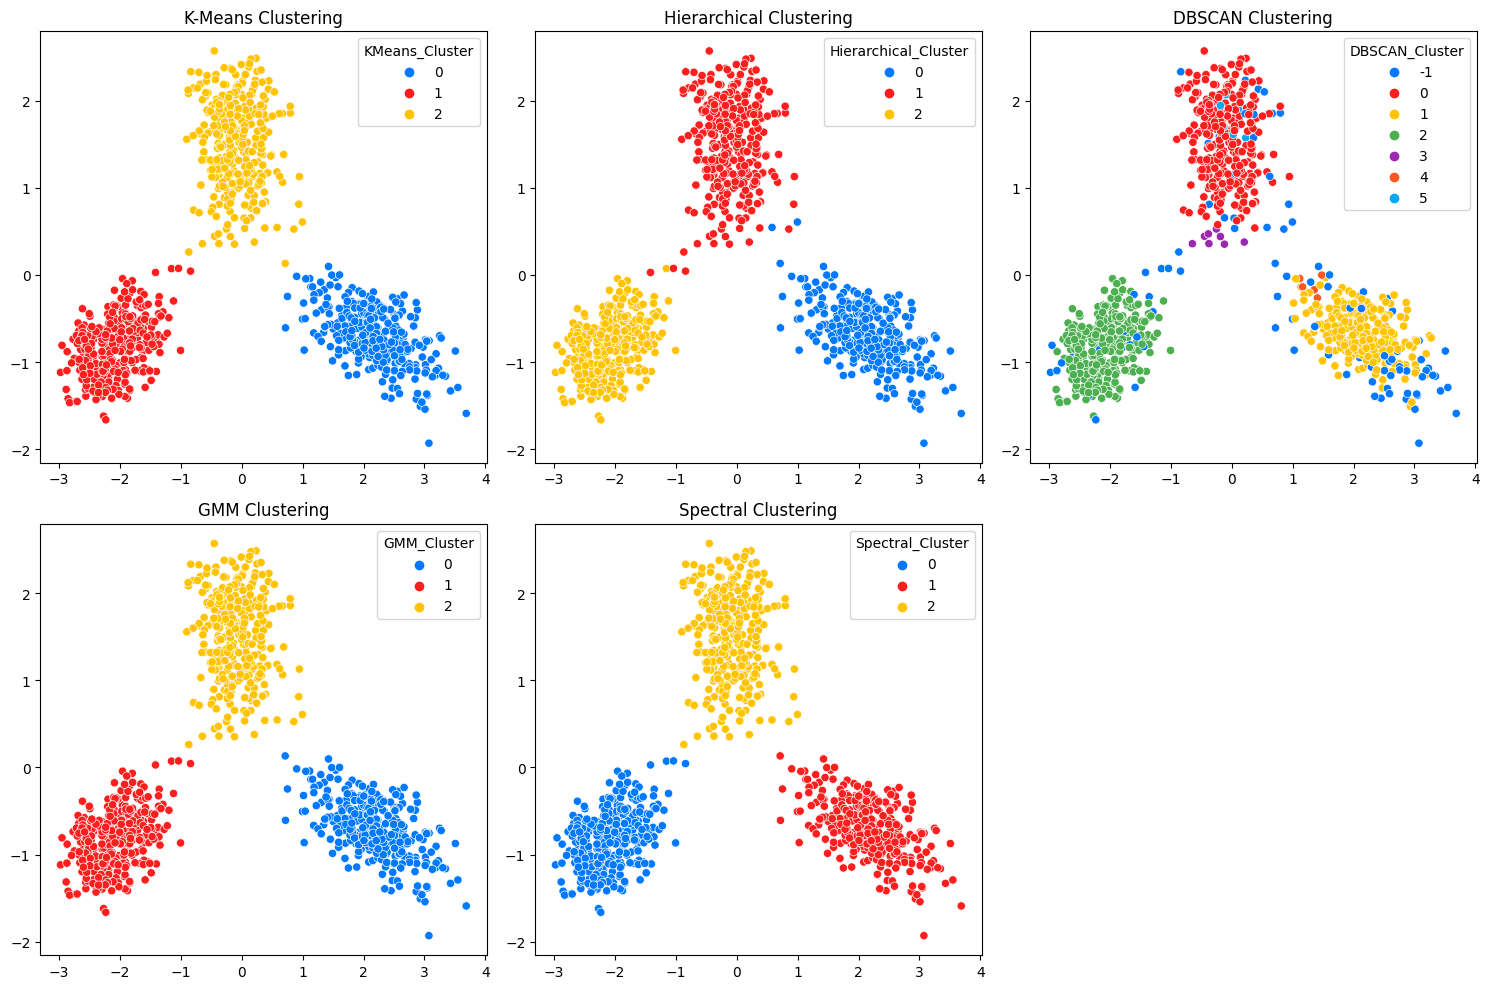

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

#custom_colours=['#0079FF','#FF1E1E','#FFC300']
custom_colours = ['#0079FF', '#FF1E1E', '#FFC300', '#4CAF50', '#9C27B0', '#FF5722', '#03A9F4']


# Create subplots to visualize different clustering results
plt.figure(figsize=(15, 10))

# K-Means Clustering Visualization
plt.subplot(231)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['KMeans_Cluster'], palette=custom_colours)
plt.title("K-Means Clustering")

# Hierarchical Clustering Visualization
plt.subplot(232)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['Hierarchical_Cluster'], palette=custom_colours)
plt.title("Hierarchical Clustering")

# DBSCAN Clustering Visualization
plt.subplot(233)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['DBSCAN_Cluster'], palette=custom_colours)
plt.title("DBSCAN Clustering")

# GMM Clustering Visualization
plt.subplot(234)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['GMM_Cluster'], palette=custom_colours)
plt.title("GMM Clustering")

# Spectral Clustering Visualization
plt.subplot(235)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train['Spectral_Cluster'], palette=custom_colours)
plt.title("Spectral Clustering")

plt.tight_layout()
plt.show()


# silhouette_score and davies_bouldin_score

In [44]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering algorithms
kmeans_silhouette = silhouette_score(scaled_features, train['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(scaled_features, train['Hierarchical_Cluster'])
dbscan_silhouette = silhouette_score(scaled_features, train['DBSCAN_Cluster'])
gmm_silhouette = silhouette_score(scaled_features, train['GMM_Cluster'])
spectral_silhouette = silhouette_score(scaled_features, train['Spectral_Cluster'])

# Print silhouette scores
print("Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette}")
print(f"Hierarchical: {hierarchical_silhouette}")
print(f"DBSCAN: {dbscan_silhouette}")
print(f"GMM: {gmm_silhouette}")
print(f"Spectral: {spectral_silhouette}")

# If ground truth labels are available, compare clustering results
# Example: adjusted_rand_score(true_labels, predicted_labels)


Silhouette Scores:
K-Means: 0.6137537274324636
Hierarchical: 0.6119908529327505
DBSCAN: 0.2314870440723826
GMM: 0.6138331296192522
Spectral: 0.6138331296192522


In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering algorithms
kmeans_silhouette = silhouette_score(scaled_features, train['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(scaled_features, train['Hierarchical_Cluster'])
dbscan_silhouette = silhouette_score(scaled_features, train['DBSCAN_Cluster'])
gmm_silhouette = silhouette_score(scaled_features, train['GMM_Cluster'])
spectral_silhouette = silhouette_score(scaled_features, train['Spectral_Cluster'])

# Print silhouette scores
print("Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette}")
print(f"Hierarchical: {hierarchical_silhouette}")
print(f"DBSCAN: {dbscan_silhouette}")
print(f"GMM: {gmm_silhouette}")
print(f"Spectral: {spectral_silhouette}")

# Davies-Bouldin Index (DBI) Scores
kmeans_db = davies_bouldin_score(scaled_features, train['KMeans_Cluster'])
hierarchical_db = davies_bouldin_score(scaled_features, train['Hierarchical_Cluster'])
dbscan_db = davies_bouldin_score(scaled_features, train['DBSCAN_Cluster'])
gmm_db = davies_bouldin_score(scaled_features, train['GMM_Cluster'])
spectral_db = davies_bouldin_score(scaled_features, train['Spectral_Cluster'])

# Print Davies-Bouldin Index (DBI) Scores
print("\nDavies-Bouldin Index (DBI) Scores:")
print(f"K-Means: {kmeans_db}")
print(f"Hierarchical: {hierarchical_db}")
print(f"DBSCAN: {dbscan_db}")
print(f"GMM: {gmm_db}")
print(f"Spectral: {spectral_db}")


Silhouette Scores:
K-Means: 0.6137537274324636
Hierarchical: 0.6119908529327505
DBSCAN: 0.2314870440723826
GMM: 0.6138331296192522
Spectral: 0.6138331296192522

Davies-Bouldin Index (DBI) Scores:
K-Means: 0.56804787372168
Hierarchical: 0.5716689519884061
DBSCAN: 1.7194660389820604
GMM: 0.5676296939249642
Spectral: 0.5676296939249642


In [12]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Clustering Algorithm", "Silhouette Score", "Davies-Bouldin Index"]

# Add the rows with the given scores rounded to 3 decimal points
table.add_row(["K-Means", round(0.6137537274324636, 3), round(0.56804787372168, 3)])
table.add_row(["Hierarchical", round(0.6119908529327505, 3), round(0.5716689519884061, 3)])
table.add_row(["DBSCAN", round(0.2314870440723826, 3), round(1.7194660389820604, 3)])
table.add_row(["GMM", round(0.6138331296192522, 3), round(0.5676296939249642, 3)])
table.add_row(["Spectral", round(0.6138331296192522, 3), round(0.5676296939249642, 3)])

# Print the table
print(table)


+----------------------+------------------+----------------------+
| Clustering Algorithm | Silhouette Score | Davies-Bouldin Index |
+----------------------+------------------+----------------------+
|       K-Means        |      0.614       |        0.568         |
|     Hierarchical     |      0.612       |        0.572         |
|        DBSCAN        |      0.231       |        1.719         |
|         GMM          |      0.614       |        0.568         |
|       Spectral       |      0.614       |        0.568         |
+----------------------+------------------+----------------------+
